# Nuages de mots

## Imports et stopwords

In [2]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\durie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "sér", "eor", "dom", "fer", "uno", "cuis", "pet", "hom", "sach", "aven", "serv", "etc", "con", "référ", "bel", "rée", "adr", "app", "los", "mat", "com", "dos", "mod", "DCM", "fem", "pers", "quo", "mén", "rossol", "gag", "réf", "elles", "exig", "très", "lundi", "mardi", "hier", "près", "ici", "vend", "ecr", "ruo", "art", "brux", "peu", "dés", "ici", "jeudi", "leurs", "devant", "suite", "bon", "vendre", "max", "chamb", "ecrire", "car", "cour", "sal", "DCM", "fois", "demi", "vient", "grande", "adresser", "pris", "annoncer", "celui", "cent", "prendre", "dès", "demande", "rue", "place", "belgique", "belges", "grand", "fil", "louer", "heures", "rien", "ans", "fille", "gros", "toute", "chez", "déjà", "bons", "matin", "Bruxelles", "jour", "mois", "ceux", "soir", "jamais", "avant", "bonne", "vers", "neuf", "petite", "midi", "belle", "dimanche", "samedi", "bas", "pied", "neuve", "écrit", "garçon", "nom", "hui", "cause", "prop", "mois", "prés", "beau", "culs", "heure", "dcm"] 
sw = set(sw)


Ajouter manuellement les mots qu'on souhaite enlever de la liste pour le nuage de mots 

Bien nettoyer la liste des mots et revérifier le nuage de mots.

## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [4]:
# Choisir une année
year = 1918

In [6]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

100

In [60]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [61]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [62]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

'A æà&j XiTOfeff ÏS W©T*ÎWBB*J‘îiï8.\'"ËÔITI«îî A R fapascg ^dfcfytfÆ .Wfti T .A numéro provisoirement ïïi!®*** m centimos. JV.ÏZiJV ÏW/A. JTo- n \'•j.K. SO§K"a\'#« .iwr«^»a*N»»«i» -frappé par te All«i»o*'

In [63]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [64]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

'A æà&j XiTOfeff ÏS W©T*ÎWBB*J‘îiï8.\'"ËÔITI«îî A R fapascg ^dfcfytfÆ .Wfti T .A numéro provisoirement ïïi!®*** m centimos. JV.ÏZiJV ÏW/A. JTo- n \'•j.K. SO§K"a\'#« .iwr«^»a*N»»«i» -frappé par te All«i»o***, qui I ul rnt f»\\cvé-U jlts^uc totalité rte son («atérUl. Des 8X lions >Ie réquisition qu\'il a ou devrait avoir en sa posses- ilo.i, un seul çoasiate-lVnSèvtiaunt do P rte de »6 moteurs é:r«trJ«iuW5; rautres de 200,009 ÿlloÿ\'de papier, qui ont 06 pris pour être. livré» JVî joiirnaux u-hsur6s. Noo'

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [65]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [66]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1918_clean.txt!'

In [67]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'XITOFEFF ÎWBB ËÔITI FAPASCG DFCFYTFÆ WFTI NUMÉRO PROVISOIREMENT ÏÏI CENTIMOS ÏZIJV JTO IWR FRAPPÉ ALL RNT CVÉ JLTS TOTALITÉ RTE ATÉRUL LIONS RÉQUISITION DEVRAIT POSSES ILO SEUL ÇOASIATE LVNSÈVTIAUNT RTE MOTEURS TRJ RAUTRES ŸLLOŸ PAPIER LIVRÉ JVÎ JOIIRNAUX NOOS PARAÎTRONS NOUN ORRTR NIOVENS FORTUNE LECTEURS EXCUSERONT MARTE OUTILLAGE COMPLET COMMANDÉS SIX MOTS ÏTTES UNLS PCNNEUFÔID PARAÎTRE HENTOT TTAUS TONDITVOO CCILÉÀ IDÉMPI GIL OPOIIN RTH NTFT PROXL FDRQMENL SPÇNDTVS ENNEMI ENLEVÉ HOLAPPRQYLSI'

## Nuage de mots

### Afficher les termes les plus fréquents


In [68]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('BRUXELLES', 1443), ('GUERRE', 996), ('MAISON', 785), ('PRIX', 745), ('AGENCE', 671), ('DÉCEMBRE', 669), ('PART', 588), ('PAYS', 566), ('BELGE', 555), ('ALLEMANDS', 529)]


### Créer, stocker et afficher le nuage de mots

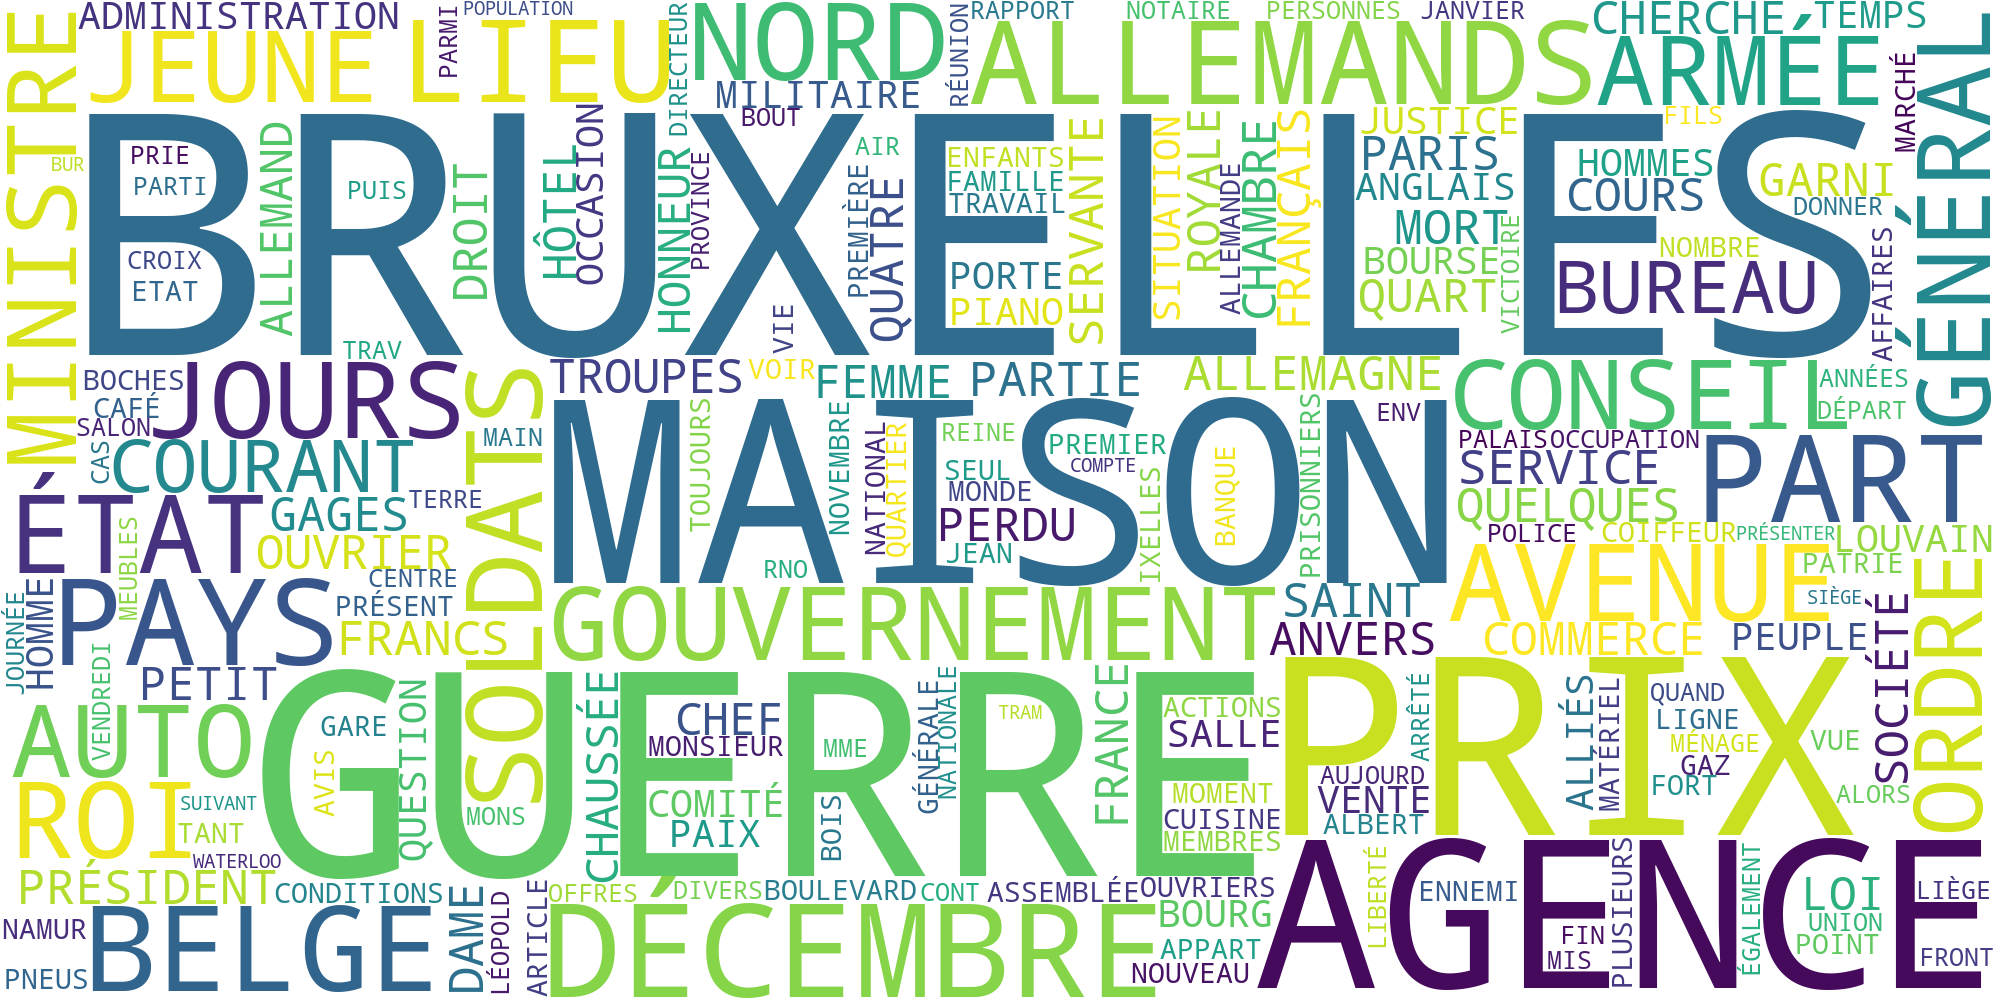

In [69]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))